In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Importing the dataset
dataset = pd.read_csv(r'D:\Flask Project\Metabolism Project\tryglisaride\try.csv')

In [24]:
dataset.head()

,ID,sex,age,chol,BMI,TG,APOE,rs174548,rs4775401,HTN,chd
0,1,1,74,215,26.2,367,4,1,2,1,1
1,2,1,51,204,24.7,150,4,2,1,1,1
2,3,0,64,205,24.2,213,4,0,1,1,0
3,4,0,34,182,23.8,111,2,1,1,1,0
4,5,1,52,175,34.1,328,2,0,0,1,0


In [25]:
# Checking for null values
dataset.isnull().sum()

ID           0
sex          0
age          0
chol         0
BMI          0
TG           0
APOE         0
rs174548     0
rs4775401    0
HTN          0
chd          0
dtype: int64

In [26]:
x = dataset.drop(['TG','ID'],axis=1).values
y = dataset['TG'].values

In [27]:
print(x)

[[  1.  74. 215. ...   2.   1.   1.]
 [  1.  51. 204. ...   1.   1.   1.]
 [  0.  64. 205. ...   1.   1.   0.]
 ...
 [  1.  33. 180. ...   1.   1.   0.]
 [  1.  78. 212. ...   0.   1.   0.]
 [  0.  43. 220. ...   1.   1.   1.]]


In [28]:
print(y)

[367 150 213 111 328  53 274 137 125 209 122 163  88 209 104 391 193 233
 166 345 133 239 142 148 190 281 105  95  95 242  77 178 171 241 182 266
 284 125 166 144 198 137 234 139 118 100 283 126 165 303 228 152 126 140
 256  69 146  89 187 183 356 286 168 262 238 174 115 221 120 170 176 157
  99 156 117  88 319 340 152 252 311  89 115 105 386 102 140  99 338 178
 161 155 151 368 107 179 165 161 145 146 132 198 116  79 461 132  90 119
  94 346  71 139 253  88 103 180 184 177 335  91 114 279 102 261 236 159
 233 199 263 234  83  60  88 199 124 113 147 212 108  98 140 145 330  89
 121  69 345 145 137 308 257 250 178  98 185 120 124 171 199 347 125 154
 191 198 112 207 121 157 188  53 147 185 275  66  94 103  80 136 183  65
 106 388  90 154 214  90 313 241 182 143 191 296 136 164 118 101  70 166
 146 181 255 165 221 252 115 114 362 145 259 109 103 243 239 194 104 213
 297 279  75 262 108 276 191 112  94 116 145 303 159 197 126 355 121 110
 318 179 348  85  98  47 219 183 125  86 268 250 10

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x, y,test_size=0.33, random_state=0)

In [30]:
# Convert x_train to a DataFrame
x_train_df = pd.DataFrame(x_train, columns=dataset.drop(['TG','ID'], axis=1).columns)

# Calculate the correlation matrix
correlation_matrix = x_train_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                sex       age      chol       BMI      APOE  rs174548   
sex        1.000000  0.063898  0.175124  0.222761 -0.051055  0.043433  \
age        0.063898  1.000000  0.209947  0.360789  0.076767 -0.017451   
chol       0.175124  0.209947  1.000000  0.253610  0.312175  0.179542   
BMI        0.222761  0.360789  0.253610  1.000000  0.013870  0.078406   
APOE      -0.051055  0.076767  0.312175  0.013870  1.000000 -0.005712   
rs174548   0.043433 -0.017451  0.179542  0.078406 -0.005712  1.000000   
rs4775401 -0.075160  0.022932  0.012084  0.056896  0.025711  0.002511   
HTN        0.107883  0.083096  0.069937  0.085559  0.014403  0.134470   
chd        0.156588  0.142222  0.439433  0.112513  0.106418  0.085845   

           rs4775401       HTN       chd  
sex        -0.075160  0.107883  0.156588  
age         0.022932  0.083096  0.142222  
chol        0.012084  0.069937  0.439433  
BMI         0.056896  0.085559  0.112513  
APOE        0.025711  0.014403  0.106418  
rs174548   

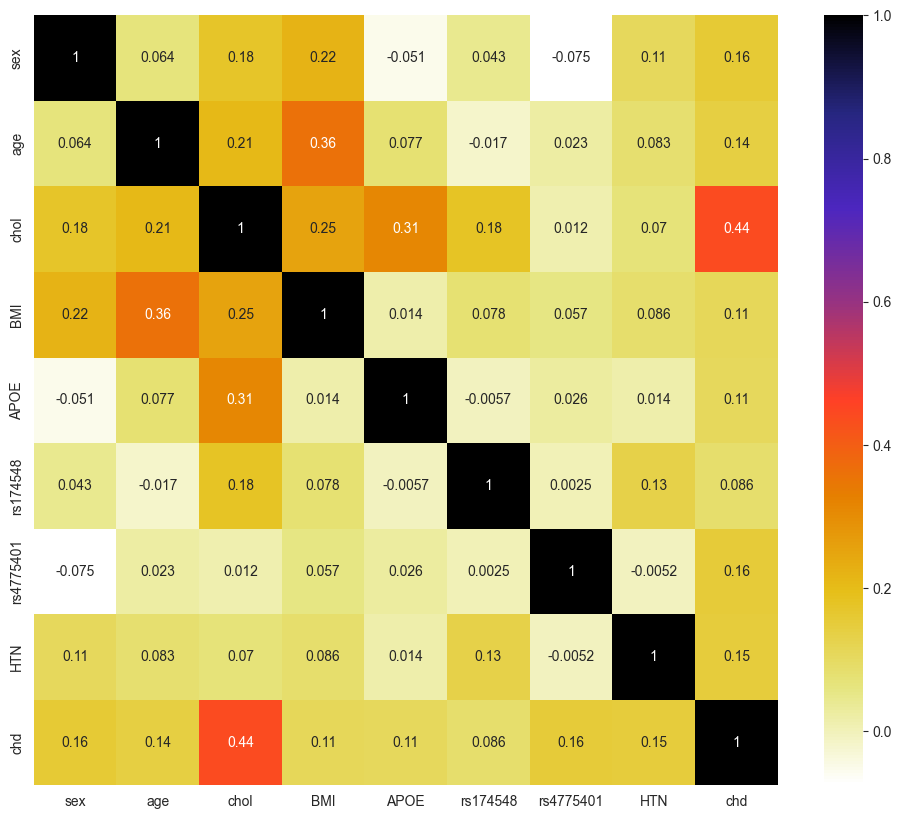

In [31]:
import seaborn as sns
#Using Pearson Correlation
plt. figure (figsize=(12,10))
cor =x_train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm. CMRmap_r)
plt.show()

In [32]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation (dataset, threshold):
    col_corr =set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features = correlation (x_train_df, 0.5)
len (set (corr_features))

0

In [34]:
corr_features

set()

In [35]:
from sklearn. linear_model import LinearRegression
ml=LinearRegression()
ml. fit (x_train, y_train)

LinearRegression()

In [36]:
y_pred=ml. predict (x_test)
print (y_pred)

[ 62.66030186 301.00361233 116.87997961  66.34081238 124.04524576
 209.51472197 175.49820198 263.7917865  188.80860931 143.38647408
 187.06518018 176.5030955   82.76032142 116.03881717  90.60616237
 165.68542049  33.27069956 184.12310008 261.07312407 201.77148457
  40.57663779 122.52936459 182.97487768 112.44459486 130.06011215
 173.8479276  169.40798435 264.89891668 288.46151176  95.36663494
 142.01858938 319.97190971 152.6075647  119.9541815  185.32006638
 246.99429455 215.52550041 117.12306744  98.12598387 112.270158
 143.80851119 184.23401142 269.87404154 153.27522348 171.04506098
 213.95020671  90.69346653 156.11107426 237.17320912 132.58551025
 132.11998248 124.41000308 215.43861568 198.00974068 259.75312834
 222.00249343  86.6186084  125.20125358 124.9934123  136.12902231
 138.3597783   85.91849115 245.2222905  128.12171162 235.69509334
 173.78280765  71.04813688  70.67006201 185.49372264  91.36776235
 142.62252204 188.84980804 201.1897389  133.4501526  103.50096734
  95.5227912

In [37]:
ml.predict ( [[1,74,215,26.2,4,1,2,1,1]])

array([236.00554888])

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7096692494125316

Text(0.5, 1.0, 'Actual vs. Predicted')

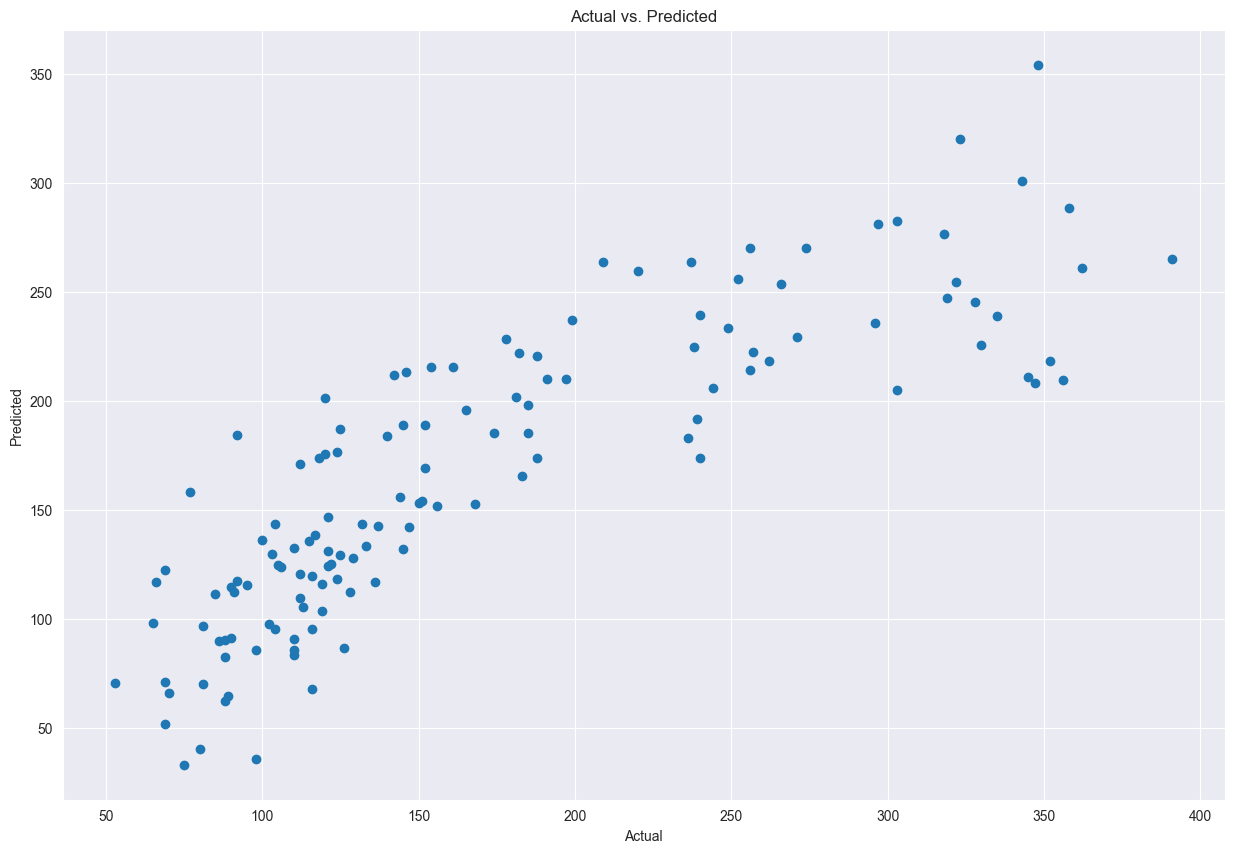

In [39]:
import matplotlib.pyplot as plt
plt. figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [40]:
pred_y_df=pd. DataFrame({'Actual Value' :y_test, 'Predicted value':y_pred, 'Difference': y_test-y_pred})
pred_y_df [0:20]

,Actual Value,Predicted value,Difference
0,88,62.660302,25.339698
1,343,301.003612,41.996388
2,136,116.879980,19.120020
3,70,66.340812,3.659188
4,106,124.045246,-18.045246
5,356,209.514722,146.485278
6,120,175.498202,-55.498202
7,209,263.791786,-54.791786
8,145,188.808609,-43.808609
9,104,143.386474,-39.386474


In [42]:
import joblib
from sklearn.metrics import r2_score

# Save the model to a .hy file
joblib.dump(ml, 'try_model.hy')

# Load the model from the .hy file
loaded_model = joblib.load('try_model.hy')

# Assuming x_test is your test data
predictions = loaded_model.predict(x_test)

# Calculate R-squared score for regression models
r2_score = r2_score(y_test, predictions)
print(f"R-squared score of the loaded model is {r2_score}")

R-squared score of the loaded model is 0.7096692494125316


In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# import joblib
#
# # Save the model to a .hy file
# file = open('HBP_model.hy', 'wb')
# joblib.dump(rand_clf, file)
# # file.close()
#
# # Load the model from the .hy file
# model = open('HBP_model.hy', 'rb')
# loaded_model = joblib.load(model)
# # model.close()
#
# # Assuming X_test is your test data
# predictions = loaded_model.predict(X_test)
# accuracy = accuracy_score(Y_test, predictions)
# print(f"Accuracy of the loaded model is {accuracy}")